In [32]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
from scipy.stats import skewnorm
from ll_xy import lonlat_to_xy
from scipy.stats import linregress
import datetime
from scipy.stats import pearsonr
import string
import cartopy
import tools
import cartopy.crs as ccrs
import pandas as pd
pd.set_option("mode.chained_assignment", None)

dep_l = pickle.load(open('../pickles/line_depths_dict.p','rb'))
statistics = pickle.load(open('../pickles/statistics.p','rb'))

In [34]:
dep_l.keys()

dict_keys([7, 8, 22, 27, 18, 25, 29, 13, 15, 31, 10, 24, 23, 16, 12, 11, 30, 19, 26, 9, 14, 20, 5])

In [41]:
for key in sorted(dep_l.keys()):
    print(key, len(dep_l[key].keys()))

5 6
7 12
8 6
9 5
10 5
11 7
12 12
13 13
14 3
15 10
16 36
18 9
19 12
20 17
22 63
23 9
24 8
25 36
26 31
27 40
29 2
30 91
31 66


0.36363636363636365 0.46857100315737465


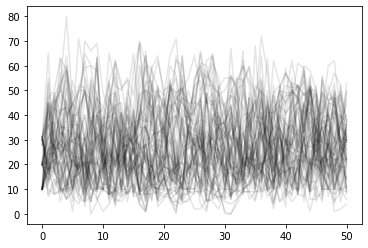

In [44]:
for station in [31]:
    
    corrs = []
    pvals = []

    null = np.zeros(51)

    for key in dep_l.keys():
    #     print(key, type(key))

        if key == station:

            d0 = null

            for date in dep_l[key].keys():

                trans = dep_l[key][date]

                p = pearsonr(d0,trans)

                d0 = trans

                pvals.append(p[1])
                corrs.append(p[0])

                plt.plot(trans,color='k',alpha=0.1)

    pvals = np.array(pvals)
    corrs = np.array(corrs)

    print(len(corrs[pvals<0.05])/len(corrs), np.mean(corrs[pvals<0.05]))

(0.36363636363636365, 0.46857100315737465)